In [ ]:
# | hide
%load_ext autoreload
%autoreload 2

# Eval - simplifying agent versioning and evaluation

Note: Eval is still in early development

## Overview


overview of need
- understanding how prompt/param/configuration affect workflow throughout different steps
- it is not enough to write expectations for output
- it is too verbose to write expectations for each node
- defining similarity between output and expectations varies case by case
- in highly parallel workflows, it is hard to know which trace will arive before another

Overview of features:
- can define expectations a subset of nodes
- and a subset of their keys using a simple DSL
- can define partial orderings between expected traces (ie which trace should arrive before another, and when does the order not matter)
- easy definition of custom similarity metrics
- automated away boiler plate in comparing different versions of an agent, finding the traces that changed and inspecting how they changed


Concepts:
- tracelog
- TestCase
  - nodes
  - conditions
- TestSet
- Comparisons



## Testing a single workflow

### Basic Flow

In [ ]:
from stringdale.core import get_git_root
from stringdale.eval import eval, eval_single
from stringdale.examples.react import ReactAgent

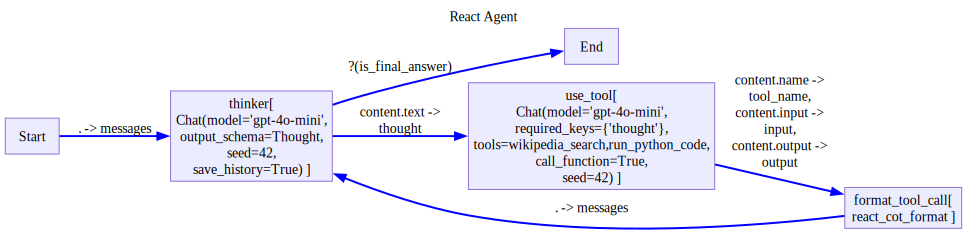

In [ ]:
ReactAgent.draw()

In [ ]:
obama_test_case = get_git_root()/'sample_data'/'eval'/'react_tutorial'/'obama.yaml'
! cat {obama_test_case}

inputs:
  - [{"role":"user","content":"Question: what is obamas age to the power of 2?"}]
test_nodes:
  - name: use_tool
    conditions:
      - key: content.name
        value: "wikipedia_search"
        func: "eq"
      - key: content.input.q
        value: "Obama"
  - name: use_tool
    conditions:
      - key: content.name
        value: run_python_code
        func: eq
      - key: content.output
        value: "({0} < 4000) & ({0} > 3000)"
        func: "eval"


  

In [ ]:
df,log_path = await eval_single(ReactAgent,obama_test_case)
log_path

PosixPath('/Users/dean/dl/stringdale/sample_data/eval/react_tutorial/obama.jsonl')

In [ ]:
df

,datapoint,node_label,trace_idx,func,key,actual,expected,distance,node_idx,trace_name,node_name,kwargs,aggregation,comp_id
0,anonymous,0,1,eq,content.name,wikipedia_search,wikipedia_search,0.00000,0,use_tool,use_tool,{},None,0
1,anonymous,0,1,None,content.input.q,Barack Obama,Obama,0.32372,0,use_tool,use_tool,{},None,1
2,anonymous,1,7,eq,content.name,run_python_code,run_python_code,0.00000,1,use_tool,use_tool,{},None,2
3,anonymous,1,7,eval,content.output,3844,({0} < 4000) & ({0} > 3000),0.00000,1,use_tool,use_tool,{},None,3


In [ ]:
# TODO walk through the res

## Available Eval Functions

In [ ]:
#| hide
from stringdale.doc import show_doc
from stringdale.eval import EVAL_FUNCS
EVAL_FUNCS

{'eq': <function stringdale.eval.eq(a, b)>,
 'eval': <function stringdale.eval.safe_eval(out, expression)>,
 'chat_eval': <function stringdale.eval.chat_eval(out: Any, expected: Any, model: str = 'gpt-4o-mini', system_prompt: str = None) -> float>,
 'cosine_dist': <function stringdale.eval.cosine_dist(out: str, expected: str, model: str = 'text-embedding-3-small') -> float>,
 'any': <function stringdale.eval.eval_any(out: Any, expected: Any) -> float>}

In [ ]:
for k,v in EVAL_FUNCS.items():
    show_doc(v)



### eq

<p align="right"> <a href="None">source</a> </p>

> **Signature:** `eq(a, b)`

None

| Parameter | Type | Default | Description |
|-----------|------|---------|-------------|




### safe_eval

<p align="right"> <a href="None">source</a> </p>

> **Signature:** `safe_eval(out, expression)`

None

| Parameter | Type | Default | Description |
|-----------|------|---------|-------------|




### chat_eval

<p align="right"> <a href="None">source</a> </p>

> **Signature:** `chat_eval(out: Any, expected: Any, model: str = 'gpt-4o-mini', system_prompt: str = None) -> float`

None

| Parameter | Type | Default | Description |
|-----------|------|---------|-------------|
| :Returns: | <class 'float'> | - |  |




### cosine_dist

<p align="right"> <a href="None">source</a> </p>

> **Signature:** `cosine_dist(out: str, expected: str, model: str = 'text-embedding-3-small') -> float`

Compute cosine distance between two strings using OpenAI embeddings.


| Parameter | Type | Default | Description |
|-----------|------|---------|-------------|
| out | <class 'str'> | None | First string to compare |
| expected | <class 'str'> | None | Second string to compare |
| model | <class 'str'> | text-embedding-3-small | OpenAI embedding model to use (default: 'text-embedding-3-small') |
| :Returns: | <class 'float'> | - | Cosine similarity between the two strings (between -1 and 1) |




### eval_any

<p align="right"> <a href="None">source</a> </p>

> **Signature:** `eval_any(out: Any, expected: Any) -> float`

Always return 0, used to check that a key existed in the output of a node

| Parameter | Type | Default | Description |
|-----------|------|---------|-------------|
| :Returns: | <class 'float'> | - |  |



## Adding your own Eval functions

* how to do it
* how to call eval with custom functions


## Workflow Versioning

### Making our agent configurable

In [ ]:
#Rag example


### Comparing versions

## Complex trace dependencies

In [ ]:

# synthesizer example
# show paraller true,
# before and after using label


## Debugging test cases

In [ ]:
from stringdale.eval import eval_single, validate_test_case

ImportError: cannot import name 'eval_single' from 'stringdale.eval' (/Users/dean/dl/stringdale/stringdale/eval.py)

In [ ]:
"""

# Debugging

- eval single
- validate endpoints

In the end:

- Explaining lazy eval (how to avoid too many llm calls when evaling)

- Limiting concurrent calls with Semaphores

- Train and Tests sets, checking for overfitting

- Eval behind the scenes
  - Event streaming algorithm
 
- Refernce
  - all end points
- all eval functions

- TestCase Schema

